# Project: Diabetes Prediction using Machine Learning

**Author: Duna Majhi**

**Institute: Guru Ghasidas Vishwavidyalaya , Bilaspur, Chhattisgarh**

Description:
This project predicts diabetes based on medical input data using an XGBoost classifier,
evaluated using multiple performance metrics and explained using SHAP visualizations.



# Step 1: Install Required Packages

In [ ]:
!pip install seaborn plotly xgboost shap


#  Step 2: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb
import shap


#  Step 3: Load Dataset

In [ ]:

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df['Diabetes'] = df['Outcome']
df.drop('Outcome', axis=1, inplace=True)
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x == 1 else False)


#  Step 4: Normalize Numerical Columns

In [ ]:

for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    df[col] = df[col] / df[col].max()


#  Step 5: Prepare Features & Labels

In [ ]:

features = df.drop("Diabetes", axis=1).values
labels = df['Diabetes'].values
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)


#  Step 6: Train XGBoost with Grid Search

In [ ]:

parameters = {'n_estimators': [100, 150], 'max_depth': [3, 5, 7]}
clf = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), parameters)
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 150]})


#  Step 7: Model Evaluation

In [ ]:

y_pred = clf.predict(x_val)
print("Classification Report:\n", classification_report(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.73      0.76        99
        True       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154




#  Step 8: Confusion Matrix

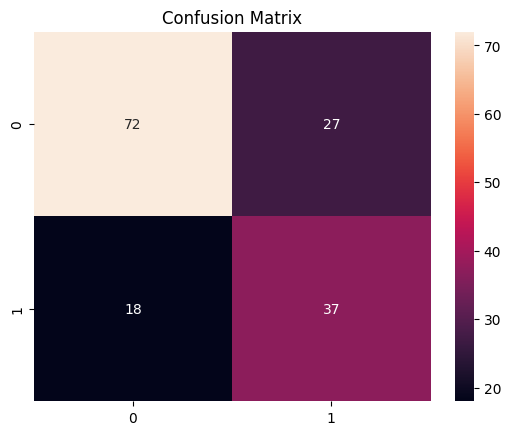

In [ ]:

conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


#  Step 9: ROC Curve & AUC

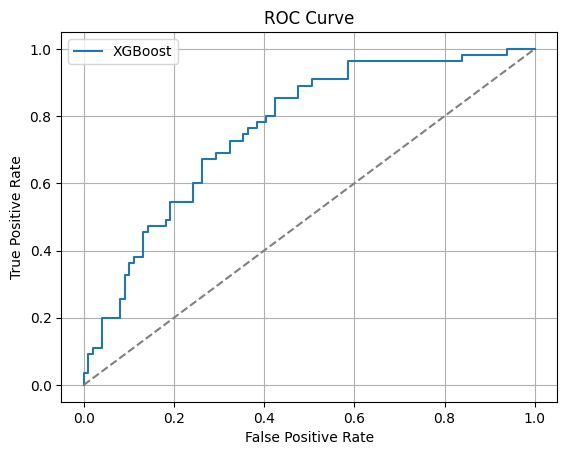

AUC Score: 0.7621671258034894


In [ ]:
y_proba = clf.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
print("AUC Score:", roc_auc_score(y_val, y_proba))


#  Step 10: SHAP Explainability

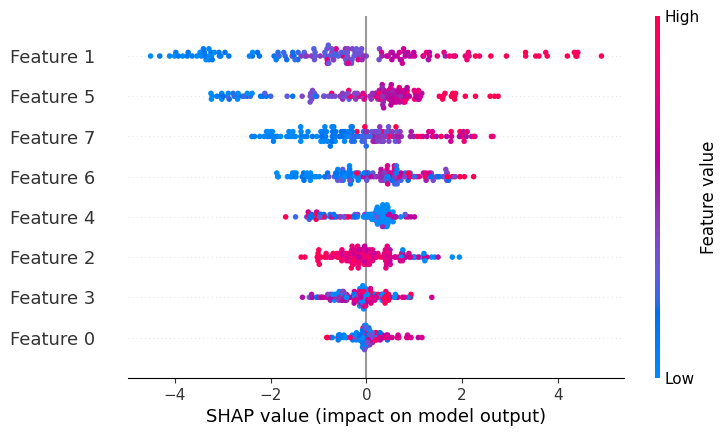

In [ ]:

explainer = shap.Explainer(clf.best_estimator_)
shap_values = explainer(x_val)
shap.plots.beeswarm(shap_values)


#  Step 11: Cross-validation F1 Score

In [ ]:

f1_scores = cross_val_score(clf.best_estimator_, features, labels, cv=5, scoring='f1')
print("Average F1 Score (5-fold CV):", f1_scores.mean())

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average F1 Score (5-fold CV): 0.6417518642710576


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#  Step 11 : Final Summary Print Cell

In [ ]:
print("Best Parameters from GridSearchCV:", clf.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Average F1 Score (CV):", f1_scores.mean())


Best Parameters from GridSearchCV: {'max_depth': 3, 'n_estimators': 150}
Validation Accuracy: 0.7077922077922078
Average F1 Score (CV): 0.6417518642710576
